#### C. Consider the function Q(x,y) = f(y)+f'(y)(x - y)+ 1/2 * (x - y)^2. Plot f(x), Q(x, 2), and Q(x,1) as a function of x.

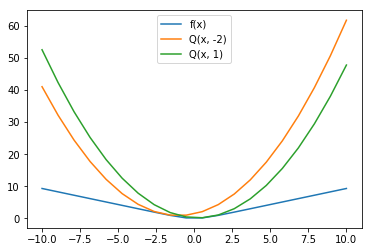

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

plt.figure()
x = np.linspace(-10, 10, 20)

def f(x):
    return np.log(np.cosh(x))

def f_derivative(x):
    return np.tanh(x)


plt.plot(x, f(x),label="f(x)")
plt.plot(x, f(-2) + f_derivative(-2) * (x + 2) + 0.5 * np.power(x + 2, 2), label = "Q(x, -2)")
plt.plot(x, f(1) + f_derivative(1) * (x - 1) + 0.5 * np.power(x - 1, 2), label = "Q(x, 1)")

plt.legend()
plt.show()

#### f. Write a simple program to show that your update rule in (e) converges numerically for the initial guesses x0 = -2 and x0 = 1. Turn in your source code as well as plots of xn versus n.

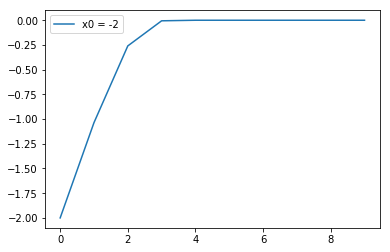

In [97]:
def update(x, iter):
    v = []
    n = [i for i in range(iter)]
    res = []
    for _ in range(len(n)):
        v.append(x)
        x = x - np.tanh(x)
    return n, v

n, v = update(-2, 10)
plt.plot(n, v, label = "x0 = -2")

plt.legend()
plt.show()

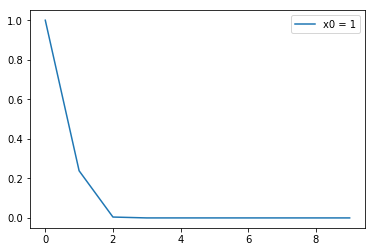

In [98]:
n, v = update(1, 10)
plt.plot(n, v, label = "x0 = 1")

plt.legend()
plt.show()

#### g. Repeat parts (e) and (f) using the update rule for Newton’s method: namely, xn+1 = xn - f'(xn)/f''(xn). What happens and why?

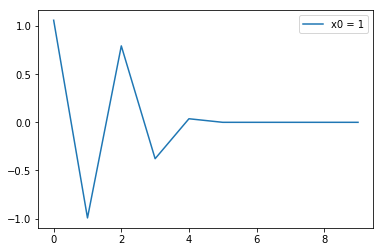

In [159]:
def update_newton(x, iter):
    v = []
    n = [i for i in range(iter)]
    res = []
    for _ in range(len(n)):
        v.append(x)
        x = x - np.tanh(x)/(1 - np.tanh(x) * np.tanh(x))
    return n, v

n, v = update_newton(1, 10)
plt.plot(n, v, label = "x0 = 1")

plt.legend()
plt.show()

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


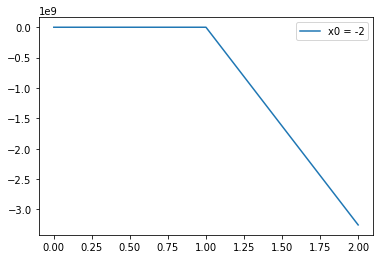

In [140]:
n, v = update_newton(-2, 10)
plt.plot(n, v, label = "x0 = -2")

plt.legend()
plt.show()

x_min is : -1.08708708709
x_max is : 1.08708708709


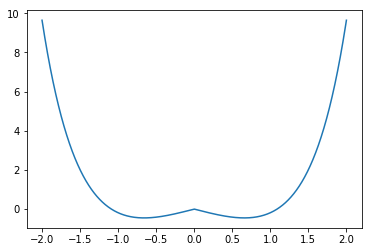

In [211]:
x = np.linspace(-2, 2, 1000)
    
def y1(x):
    return np.abs(x - 1.0/2 * np.sinh(2 * x)) - np.abs(x)

for k in x:
    if y1(k) < 0:
        print("x_min is : " + str(k))
        break

for k in x[::-1]:
    if y1(k) < 0:
        print("x_max is : " + str(k))
        break
        
plt.plot(x, y1(x) ,label = "y1(x)")
y = y1(x)

#### So, upper bound on |x0| is 1.087

#### h. Plot the function g(x) = $\sum_{k = 1}^{10}$ log cosh (x + 1/k). Is it still simple to find the exact minimum? 

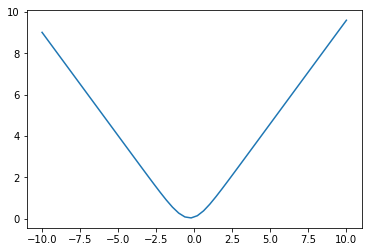

In [180]:
x = np.linspace(-10, 10, 50)

def g(x):
    y = 0
    for k in range(1, 11):
        y += np.log(np.cosh(x + 1.0 / k))
    return 0.1 * y

plt.plot(x, g(x) ,label="g(x)")

        

#### k. Use the update rule from part (j) to locate the minimum of g(x) to four significant digits. In addition to your answer for the minimum, turn in your source code as well as plots of xn versus n.

Minimum of g(x) is 0.03266
Corresponding x is -0.28303


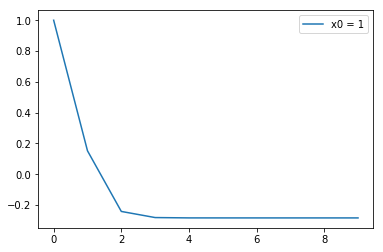

In [135]:
def update_R(x, iter):
    v = []
    n = [i for i in range(iter)]
    res = []
    for _ in range(len(n)):
        v.append(x)
        derivative = 0
        for k in range(1, 11):
            derivative += np.tanh(x + 1.0 / k)
        x -= 0.1 * derivative
    return n, v

n, v = update_R(1, 10)
print('Minimum of g(x) is %.5f' %g(v[-1]))
print('Corresponding x is %.5f' %v[-1])
plt.plot(n, v, label = "x0 = 1")

plt.legend()
plt.show()